In [76]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
X = sps.cauchy.rvs(loc=0, scale=1, size=100)

Рассматривается следующая параметрическая модель: 𝑋1, ..., 𝑋𝑁 — выборка из рас-
пределения 𝑁(𝜃, 1). Известно, что 𝜃 близко к нулю: с вероятностью не менее 0.95
выполнено неравенство |𝜃| < 0.5.

По максимальному правдоподобию

In [78]:
est_likelihood = np.array([np.array(X[:i]).mean() for i in range(1,101)])

Байесовская оценка. Сигму берем по правилу двух сигм. x+=2$\sigma$ покроет 95% площади <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/325px-Standard_deviation_diagram_%28decimal_comma%29.svg.png">

$2\sigma_{prior} = 0.5\ -> \sigma_{prior} = 0.25$

In [79]:
cauchy_mu = 0
cauchy_sigma = 1

mu_prior = 0
sigma_prior = 0.25

In [80]:
est_bayes = np.array( [ ( mu_prior/(sigma_prior**2) + (X[:n].sum()/(cauchy_sigma**2)) )/
                        ( (1/(sigma_prior**2)) + n/(cauchy_sigma**2) ) 
                        for n in range (1,101)] )

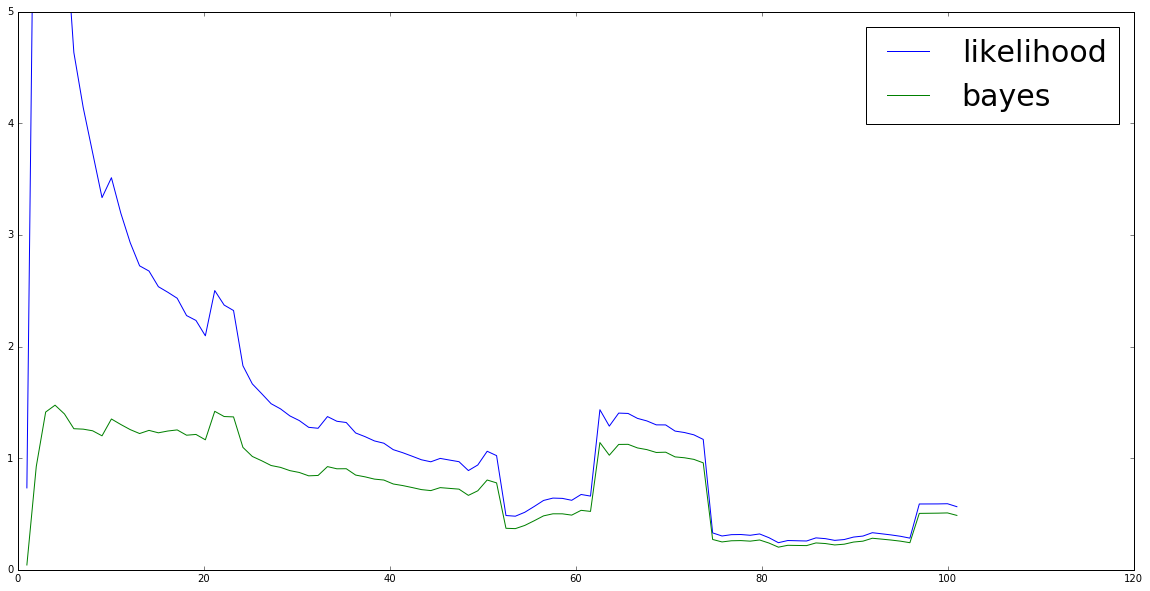

In [83]:
x = np.linspace(1, 101, 100)
plt.figure(figsize=(20,10))
plt.plot(x, abs(est_likelihood - cauchy_mu), label = 'likelihood')
plt.plot(x, abs(est_bayes - cauchy_mu), label = 'bayes')
plt.legend(fontsize=30)
plt.ylim(0,5)
plt.show()

При малом количестве информации байесовская оценка выигрывает у оценки максимального правдоподобия из-за наличия начальных знаний о выборке. Но с ростом n правдоподобная и байесовская оценки сходятся к одному и тому же. Значит, при наличии некоторых начальных знаний, лучше пользоваться байесовской оценкой, если это возможно.